In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [76]:
'1.'

'1.'

In [2]:
df = pd.read_csv("C:\\Users\\dhku1\\Downloads\\diabetes.csv")

In [3]:
import seaborn as sns

<AxesSubplot:>

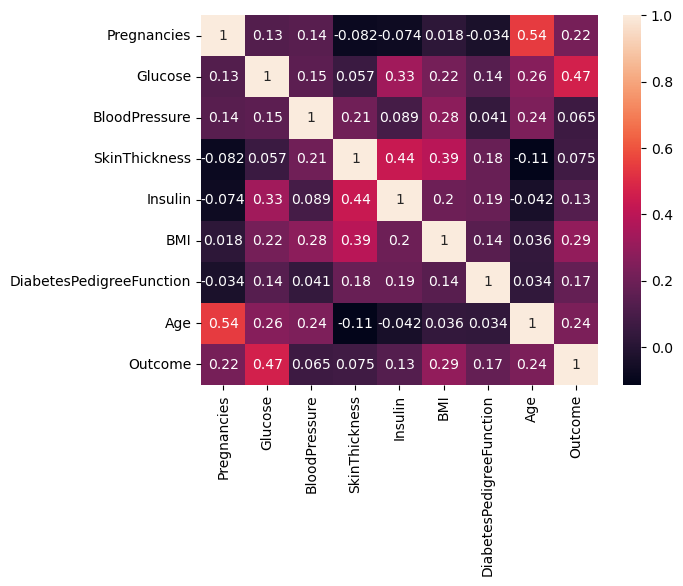

In [4]:
sns.heatmap(df.corr(), annot = True)

In [77]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [78]:

df.median()

Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      30.5000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64

In [79]:
'2.'

'2.'

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, r2_score, confusion_matrix, roc_curve, roc_auc_score

In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df['Outcome']

In [81]:
'STEP 3.'

'STEP 3.'

In [9]:
x_train, x_test , y_train, y_test = train_test_split(X,y,test_size=0.2)

In [82]:
'STEP 4'

'STEP 4'

In [10]:
classifier = DecisionTreeClassifier()

In [119]:
parametre = {'criterion': ['gini','entropy'], 'splitter':['best', 'random'],'max_depth':[2,3,4,5,6,7,8,9,10,11,12,13], 'max_features':['auto', 'sqrt', 'log2']}
clf = GridSearchCV(classifier, param_grid=parametre ,cv =5)
clf.fit(x_train, y_train)
clf.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'splitter': 'best'}

In [120]:
classifer = DecisionTreeClassifier(criterion='gini',
 max_depth=6,
 max_features='auto',
 splitter= 'best')

In [121]:
classifer.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, max_features='auto')

In [122]:
y_pred = classifer.predict(x_test)

In [113]:
'STEP 5'

'STEP 5'

In [127]:
print(accuracy_score(y_pred, y_test))
print(mean_squared_error(y_pred, y_test))
print(r2_score(y_pred, y_test))
print(classification_report(y_pred, y_test))

0.7792207792207793
0.22077922077922077
0.021856902671399503
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       101
           1       0.69      0.66      0.67        53

    accuracy                           0.78       154
   macro avg       0.76      0.75      0.75       154
weighted avg       0.78      0.78      0.78       154



In [125]:
print(confusion_matrix(y_pred, y_test))

[[85 16]
 [18 35]]


In [126]:
fpr, tpr, thresold = roc_curve(y_test,y_pred)

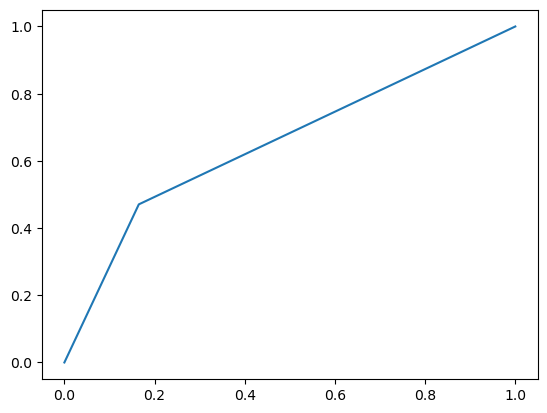

In [124]:
plt.plot( fpr, tpr)

In [123]:
roc_auc_score(y_test, y_pred)

0.7557586141252617

In [36]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [84]:
'step 6'

'step 6'

[Text(0.45454545454545453, 0.9285714285714286, 'BMI <= 27.85\ngini = 0.457\nsamples = 614\nvalue = [397, 217]'),
 Text(0.21103896103896103, 0.7857142857142857, 'Glucose <= 144.5\ngini = 0.198\nsamples = 180\nvalue = [160, 20]'),
 Text(0.09090909090909091, 0.6428571428571429, 'BMI <= 26.35\ngini = 0.136\nsamples = 163\nvalue = [151, 12]'),
 Text(0.025974025974025976, 0.5, 'Pregnancies <= 2.5\ngini = 0.048\nsamples = 121\nvalue = [118, 3]'),
 Text(0.012987012987012988, 0.35714285714285715, 'gini = 0.0\nsamples = 66\nvalue = [66, 0]'),
 Text(0.03896103896103896, 0.35714285714285715, 'BloodPressure <= 93.0\ngini = 0.103\nsamples = 55\nvalue = [52, 3]'),
 Text(0.025974025974025976, 0.21428571428571427, 'BMI <= 23.75\ngini = 0.071\nsamples = 54\nvalue = [52, 2]'),
 Text(0.012987012987012988, 0.07142857142857142, 'gini = 0.0\nsamples = 25\nvalue = [25, 0]'),
 Text(0.03896103896103896, 0.07142857142857142, 'gini = 0.128\nsamples = 29\nvalue = [27, 2]'),
 Text(0.05194805194805195, 0.21428571428

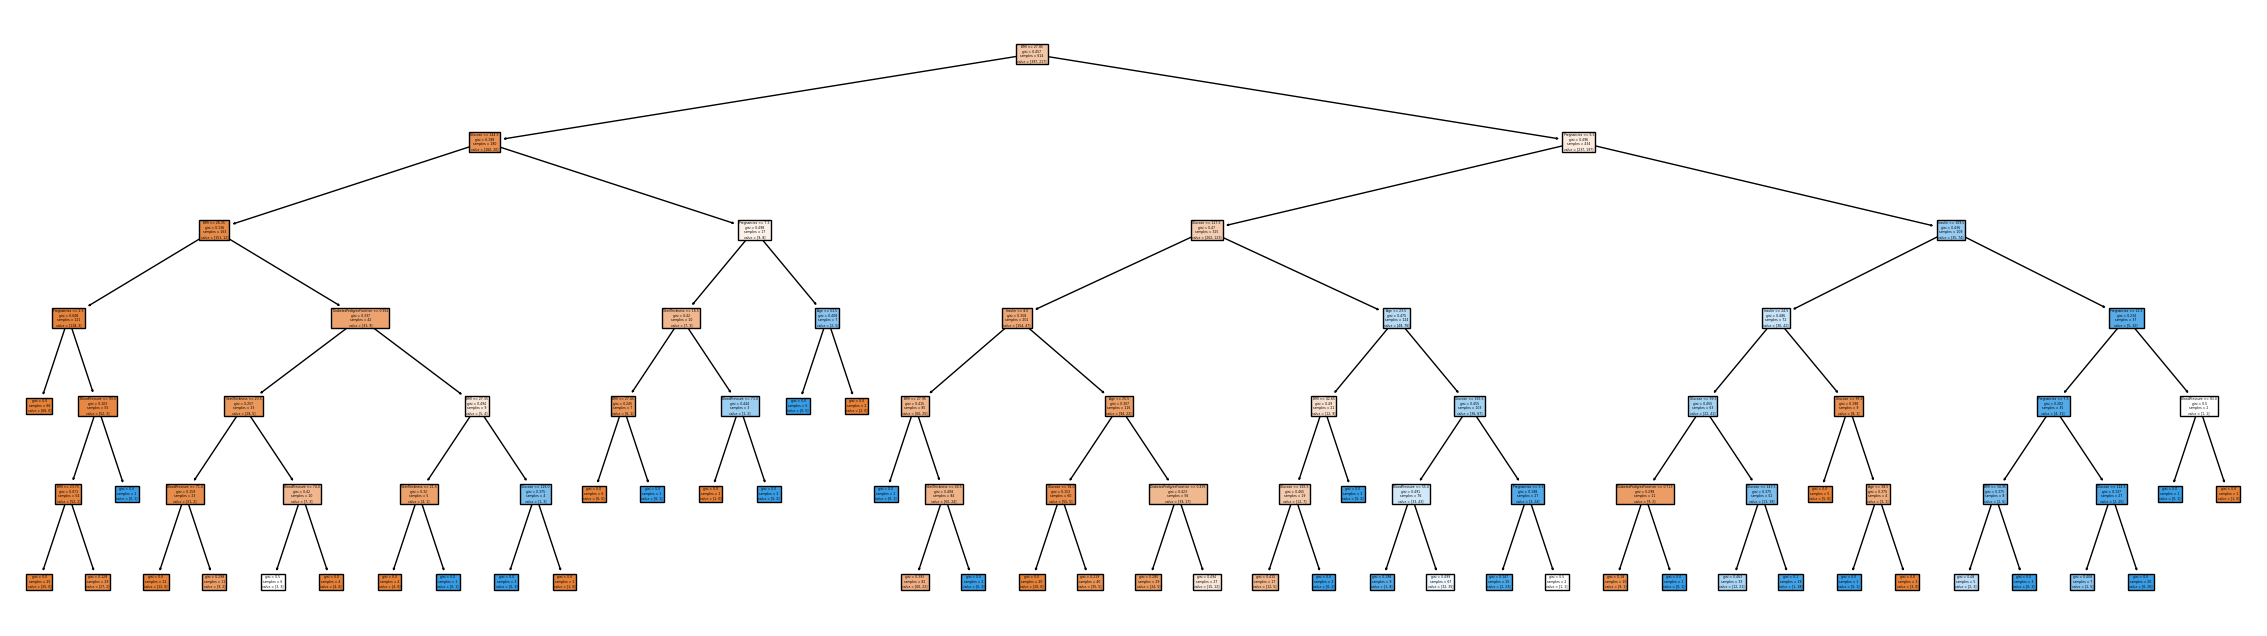

In [129]:
plt.figure(figsize=(29,8))
plot_tree(classifer, filled = True, feature_names=X.columns)

In [130]:
''' 
Root node start from BMI having thresold value of 27.85. then glucose bieng next important variable.
'''

' \nRoot node start from BMI having thresold value of 27.85. then glucose bieng next important variable.\n'

In [86]:
'step7' 

'step7'

In [89]:
clf.predict([[9,89,62,0,0,22.5,0.142,33]])

C:\Users\dhku1\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [134]:
g = df[df['BMI']<=27.85]

In [135]:
g['Outcome'].value_counts()

0    195
1     27
Name: Outcome, dtype: int64